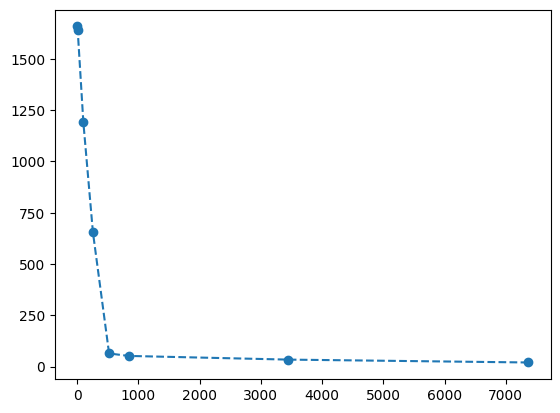

In [1]:
import numpy as np
import matplotlib.pyplot as plt
espesor = np.array([7367, 3448, 840, 522, 258, 102, 9.6, 4.5])  # [mg/cm²]
cuentas_2 = np.array([20, 34, 52, 64, 655, 1190, 1640, 1658])
grosor=np.array([0.78,0.4,0.32,0.21,0.075,0.01,0.01016,0.00178]) # [cm]
plt.plot(espesor,cuentas_2,"o--")

In [2]:
print(len(espesor))

8


AJUSTE EXPONENCIAL: y(x) = m * exp(a*x) + b
Coeficiente m = 1724.047894
Coeficiente a = -0.004058
Coeficiente b = -5.893424
R² = 0.992454
Ecuación: y(x) = 1724.0479 * exp(-0.0041*x) + -5.8934


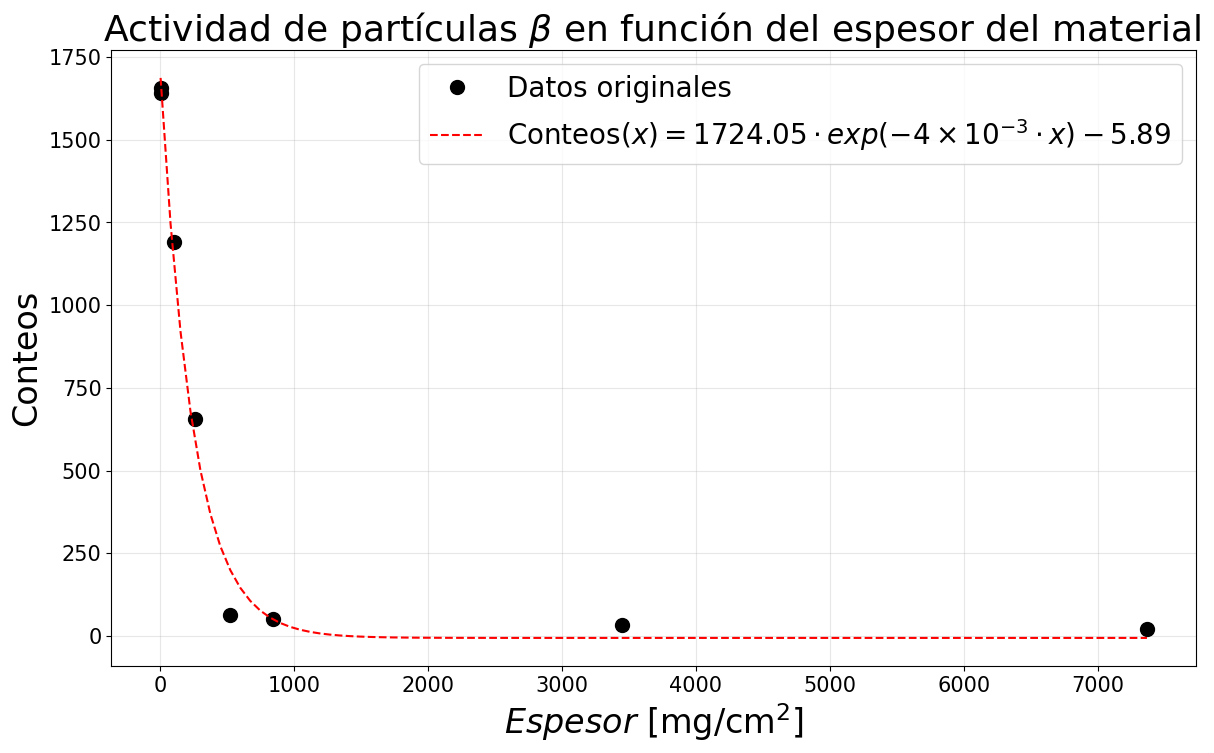


COMPARACIÓN DATOS vs AJUSTE:
x	Dato y		Ajuste y	Diferencia
--------------------------------------------------
7367.0	20.00		-5.89		+25.89
3448.0	34.00		-5.89		+39.89
840.0	52.00		51.14		+0.86
522.0	64.00		201.39		-137.39
258.0	655.00		599.23		+55.77
102.0	1190.00		1133.79		+56.21
9.6	1640.00		1652.28		-12.28
4.5	1658.00		1686.96		-28.96


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcion_exponencial(x, m, a, b):
    """
    Función exponencial de la forma: y(x) = m * exp(a*x) + b
    """
    return m * np.exp(a * x) + b

def calcular_ajuste_exponencial(x, y):
    """
    Calcula los coeficientes m, a, b para la mejor relación exponencial
    y(x) = m * exp(a*x) + b
    """
    try:
        # Estimación inicial de parámetros
        # Para una función exponencial pura y ≈ m*exp(a*x), podemos linealizar:
        # ln(y - b) ≈ ln(m) + a*x
        # Como b es desconocido, empezamos con b = min(y) - 1
        b_guess = np.min(y) - 1
        
        # Ajustamos ln(y - b_guess) vs x para obtener estimaciones iniciales
        y_ajustada = y - b_guess
        y_ajustada = np.where(y_ajustada > 0, y_ajustada, 1e-10)  # Evitar log(0)
        
        coef_lineal = np.polyfit(x, np.log(y_ajustada), 1)
        a_guess = coef_lineal[0]
        m_guess = np.exp(coef_lineal[1])
        
        # Parámetros iniciales
        parametros_iniciales = [m_guess, a_guess, b_guess]
        
        # Ajuste no lineal usando curve_fit
        parametros_optimos, matriz_covarianza = curve_fit(funcion_exponencial, x, y, p0=parametros_iniciales, maxfev=5000)
        
        m, a, b = parametros_optimos
        
        # Calcular R²
        y_pred = funcion_exponencial(x, m, a, b)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_cuadrado = 1 - (ss_res / ss_tot)
        
        return m, a, b, r_cuadrado, y_pred
        
    except Exception as e:
        print(f"Error en el ajuste: {e}")
        return None, None, None, None, None

# EJEMPLO DE USO
if __name__ == "__main__":
    # Datos de ejemplo (puedes reemplazar con tus propias listas)
    x_datos = np.array([7367, 3448, 840, 522, 258, 102, 9.6, 4.5])
    y_datos = np.array([20, 34, 52, 64, 655, 1190, 1640, 1658])
    #y_datos=np.log(y_datos)
    # Calcular el ajuste exponencial
    m, a, b, r2, y_predicho = calcular_ajuste_exponencial(x_datos, y_datos)
    
    if m is not None:
        print("=" * 50)
        print("AJUSTE EXPONENCIAL: y(x) = m * exp(a*x) + b")
        print("=" * 50)
        print(f"Coeficiente m = {m:.6f}")
        print(f"Coeficiente a = {a:.6f}")
        print(f"Coeficiente b = {b:.6f}")
        print(f"R² = {r2:.6f}")
        print("=" * 50)
        print(f"Ecuación: y(x) = {m:.4f} * exp({a:.4f}*x) + {b:.4f}")
        print("=" * 50)
        
        # Gráfico
        plt.figure(figsize=(14, 8))
        plt.plot(x_datos, y_datos,"o", color='black', label='Datos originales', markersize=10)
        x_suave = np.linspace(min(x_datos), max(x_datos), 100)
        y_suave = funcion_exponencial(x_suave, m, a, b)
        plt.plot(x_suave, y_suave,"--",color="red", label=r'$\text{Conteos}(x)=1724.05\cdot exp(-4\times10^{-3}\cdot x) -5.89$')
        plt.xlabel(r'$Espesor$ [mg/cm$^{2}$]', fontsize=24)
        plt.ylabel(r'Conteos' , fontsize=24)
        plt.title(r'Actividad de partículas $\beta$ en función del espesor del material ', fontsize=26)
        plt.xticks(fontsize=15)  # tamaño de los números en el eje x
        plt.yticks(fontsize=15)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=20)
        plt.show()
        
        # Tabla de valores comparativos
        print("\nCOMPARACIÓN DATOS vs AJUSTE:")
        print("x\tDato y\t\tAjuste y\tDiferencia")
        print("-" * 50)
        for i in range(len(x_datos)):
            diferencia = y_datos[i] - y_predicho[i]
            print(f"{x_datos[i]}\t{y_datos[i]:.2f}\t\t{y_predicho[i]:.2f}\t\t{diferencia:+.2f}")
    
    else:
        print("No se pudo realizar el ajuste exponencial")

In [32]:
grosor=np.array([0.78,0.4,0.32,0.21,0.075,0.01,0.01016,0.00178])

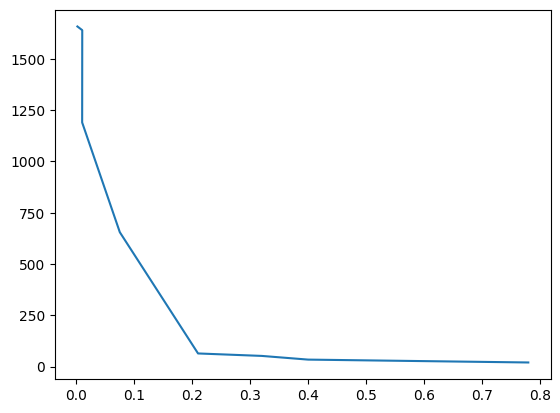

In [33]:
cuentas = np.array([20, 34, 52, 64, 655, 1190, 1640, 1658])
plt.plot(grosor,cuentas)

AJUSTE EXPONENCIAL: y(x) = m * exp(a*x) + b
Coeficiente m = 1636.749526
Coeficiente a = -1328.882913
Coeficiente b = 14.426298
R² = 0.970543
Ecuación: y(x) = 1636.7495 * exp(-1328.8829*x) + 14.4263


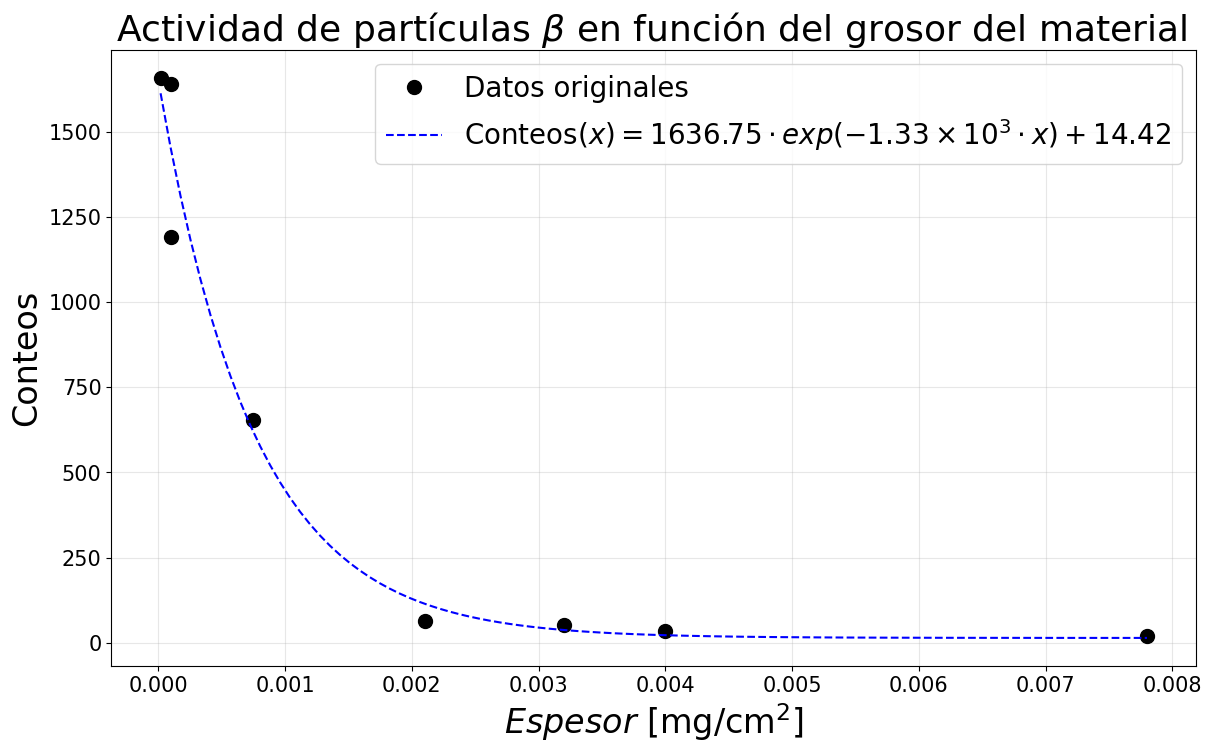


COMPARACIÓN DATOS vs AJUSTE:
x	Dato y		Ajuste y	Diferencia
--------------------------------------------------
0.0078000000000000005	20.00		14.48		+5.52
0.004	34.00		22.47		+11.53
0.0032	52.00		37.72		+14.28
0.0021	64.00		114.89		-50.89
0.00075	655.00		618.57		+36.43
0.0001	1190.00		1447.50		-257.50
0.0001016	1640.00		1444.46		+195.54
1.78e-05	1658.00		1612.91		+45.09


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcion_exponencial(x, m, a, b):
    """
    Función exponencial de la forma: y(x) = m * exp(a*x) + b
    """
    return m * np.exp(a * x) + b

def calcular_ajuste_exponencial(x, y):
    """
    Calcula los coeficientes m, a, b para la mejor relación exponencial
    y(x) = m * exp(a*x) + b
    """
    try:
        # Estimación inicial de parámetros
        # Para una función exponencial pura y ≈ m*exp(a*x), podemos linealizar:
        # ln(y - b) ≈ ln(m) + a*x
        # Como b es desconocido, empezamos con b = min(y) - 1
        b_guess = np.min(y) - 1
        
        # Ajustamos ln(y - b_guess) vs x para obtener estimaciones iniciales
        y_ajustada = y - b_guess
        y_ajustada = np.where(y_ajustada > 0, y_ajustada, 1e-10)  # Evitar log(0)
        
        coef_lineal = np.polyfit(x, np.log(y_ajustada), 1)
        a_guess = coef_lineal[0]
        m_guess = np.exp(coef_lineal[1])
        
        # Parámetros iniciales
        parametros_iniciales = [m_guess, a_guess, b_guess]
        
        # Ajuste no lineal usando curve_fit
        parametros_optimos, matriz_covarianza = curve_fit(funcion_exponencial, x, y, p0=parametros_iniciales, maxfev=5000)
        
        m, a, b = parametros_optimos
        
        # Calcular R²
        y_pred = funcion_exponencial(x, m, a, b)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_cuadrado = 1 - (ss_res / ss_tot)
        
        return m, a, b, r_cuadrado, y_pred
        
    except Exception as e:
        print(f"Error en el ajuste: {e}")
        return None, None, None, None, None

# EJEMPLO DE USO
if __name__ == "__main__":
    # Datos de ejemplo (puedes reemplazar con tus propias listas)
    x_datos = grosor/100
    y_datos = np.array([20, 34, 52, 64, 655, 1190, 1640, 1658])
    #y_datos=np.log(y_datos)
    # Calcular el ajuste exponencial
    m, a, b, r2, y_predicho = calcular_ajuste_exponencial(x_datos, y_datos)
    
    if m is not None:
        print("=" * 50)
        print("AJUSTE EXPONENCIAL: y(x) = m * exp(a*x) + b")
        print("=" * 50)
        print(f"Coeficiente m = {m:.6f}")
        print(f"Coeficiente a = {a:.6f}")
        print(f"Coeficiente b = {b:.6f}")
        print(f"R² = {r2:.6f}")
        print("=" * 50)
        print(f"Ecuación: y(x) = {m:.4f} * exp({a:.4f}*x) + {b:.4f}")
        print("=" * 50)
        
        # Gráfico
        plt.figure(figsize=(14, 8))
        plt.plot(x_datos, y_datos,"o", color='black', label='Datos originales', markersize=10)
        x_suave = np.linspace(min(x_datos), max(x_datos), 100)
        y_suave = funcion_exponencial(x_suave, m, a, b)
        plt.plot(x_suave, y_suave,"--",color="blue", label=r'$\text{Conteos}(x)=1636.75\cdot exp(-1.33\times 10^{3}\cdot x) +14.42$')
        plt.xlabel(r'$Espesor$ [mg/cm$^{2}$]', fontsize=24)
        plt.ylabel(r'Conteos' , fontsize=24)
        plt.title(r'Actividad de partículas $\beta$ en función del grosor del material ', fontsize=26)
        plt.xticks(fontsize=15)  # tamaño de los números en el eje x
        plt.yticks(fontsize=15)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=20)
        plt.show()
        
        # Tabla de valores comparativos
        print("\nCOMPARACIÓN DATOS vs AJUSTE:")
        print("x\tDato y\t\tAjuste y\tDiferencia")
        print("-" * 50)
        for i in range(len(x_datos)):
            diferencia = y_datos[i] - y_predicho[i]
            print(f"{x_datos[i]}\t{y_datos[i]:.2f}\t\t{y_predicho[i]:.2f}\t\t{diferencia:+.2f}")
    
    else:
        print("No se pudo realizar el ajuste exponencial")

 CONVERSIONES Y CÁLCULOS A PARTIR DEL GROSOR DE LÁMINAS EN cm

──────────────────────────────────────────────────────────────────────────────────────────
1. DATOS EXPERIMENTALES
──────────────────────────────────────────────────────────────────────────────────────────

Material absorbente: Aluminio
Densidad del material (ρ): 2.7 g/cm³

Grosores medidos en cm:
[0.78    0.4     0.32    0.21    0.075   0.01    0.01016 0.00178]

Cuentas detectadas:
[  20   34   52   64  655 1190 1640 1658]

──────────────────────────────────────────────────────────────────────────────────────────
2. CONVERSIÓN: GROSOR EN cm → ESPESOR EN mg/cm²
──────────────────────────────────────────────────────────────────────────────────────────

Fórmula de conversión:
  Espesor (mg/cm²) = Grosor (cm) × Densidad (g/cm³) × 10000
  Espesor (mg/cm²) = Grosor (cm) × 2.7 × 10000

Tabla de conversión:
 Grosor (cm)  Espesor (mg/cm²)  Cuentas  ln(Cuentas)
     0.78000          21060.00       20     2.995732
     0.40000       

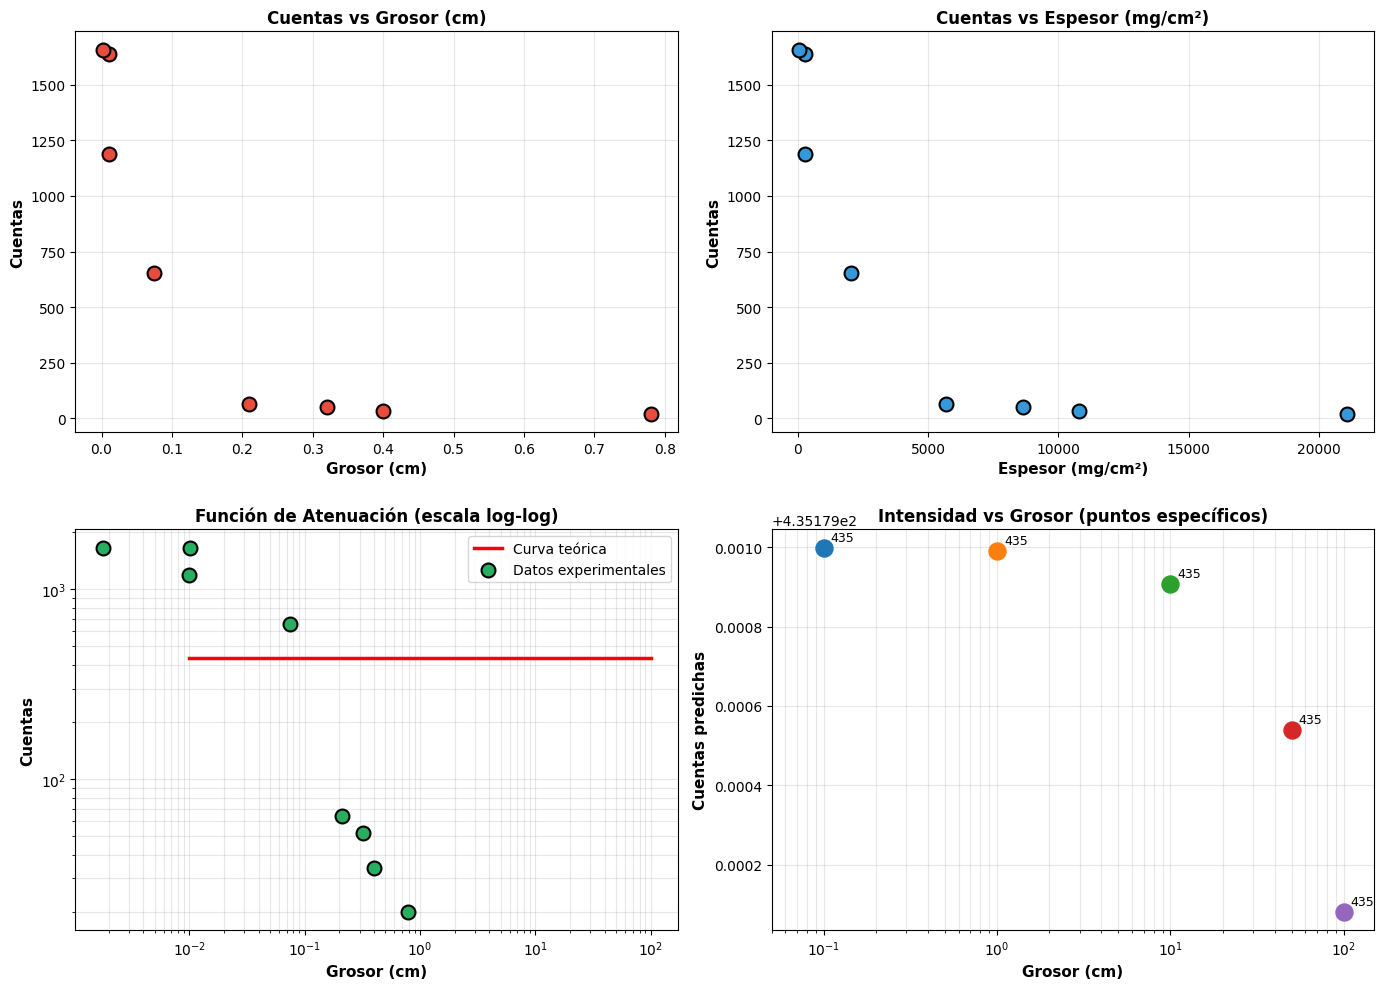


 RESUMEN DE FACTORES DE CONVERSIÓN

Para Aluminio con ρ = 2.7 g/cm³:

✓ 1 cm = 10 mm = 10000 μm
✓ 1 cm de Aluminio = 27000 mg/cm²
✓ Coeficiente μ_lineal = 0.00000002 cm⁻¹
✓ Coeficiente μ_lineal = 0.00000021 mm⁻¹
✓ Rango medio x₁/₂ = 0.045007 cm = 0.4501 mm

✓ Ecuación con grosor en cm:
  I(d) = 435.18 × e^(-0.00000002·d)



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("="*90)
print(" CONVERSIONES Y CÁLCULOS A PARTIR DEL GROSOR DE LÁMINAS EN cm")
print("="*90)

# ============================================================================
# DATOS DE ENTRADA
# ============================================================================
print("\n" + "─"*90)
print("1. DATOS EXPERIMENTALES")
print("─"*90)

# Espesores en cm (dato que típicamente tienes)
grosor_cm =np.array([0.78,0.4,0.32,0.21,0.075,0.01,0.01016,0.00178])  # [cm]
cuentas = np.array([20, 34, 52, 64, 655, 1190, 1640, 1658])

# Material (ejemplo: Al o acero)
material = "Aluminio"
densidad_material = 2.7  # g/cm³ para aluminio (si fuera Fe sería 7.87, para Cu 8.96)

print(f"\nMaterial absorbente: {material}")
print(f"Densidad del material (ρ): {densidad_material} g/cm³")
print(f"\nGrosores medidos en cm:")
print(grosor_cm)
print(f"\nCuentas detectadas:")
print(cuentas)

# ============================================================================
# CONVERSIÓN 1: DE cm A mg/cm²
# ============================================================================
print("\n" + "─"*90)
print("2. CONVERSIÓN: GROSOR EN cm → ESPESOR EN mg/cm²")
print("─"*90)

print(f"\nFórmula de conversión:")
print(f"  Espesor (mg/cm²) = Grosor (cm) × Densidad (g/cm³) × 10000")
print(f"  Espesor (mg/cm²) = Grosor (cm) × {densidad_material} × 10000")

espesor_mg_cm2 = grosor_cm * densidad_material * 10000

print(f"\nTabla de conversión:")
df_conversion = pd.DataFrame({
    'Grosor (cm)': grosor_cm,
    'Espesor (mg/cm²)': espesor_mg_cm2,
    'Cuentas': cuentas,
    'ln(Cuentas)': np.log(cuentas)
})
print(df_conversion.to_string(index=False))

# ============================================================================
# CONVERSIÓN 2: DE cm A mm
# ============================================================================
print("\n" + "─"*90)
print("3. CONVERSIÓN: GROSOR EN cm → GROSOR EN mm")
print("─"*90)

grosor_mm = grosor_cm * 10
print(f"\nTabla de conversión cm → mm:")
df_mm = pd.DataFrame({
    'Grosor (cm)': grosor_cm,
    'Grosor (mm)': grosor_mm,
    'Grosor (μm)': grosor_mm * 1000
})
print(df_mm.to_string(index=False))

# ============================================================================
# CONVERSION 3: DENSIDAD SUPERFICIAL (MASA POR UNIDAD DE ÁREA)
# ============================================================================
print("\n" + "─"*90)
print("4. CÁLCULO: DENSIDAD SUPERFICIAL (MASA POR UNIDAD DE ÁREA)")
print("─"*90)

print(f"\nLa densidad superficial (σ) es la masa de material por unidad de área:")
print(f"  σ = Grosor (cm) × Densidad (g/cm³)")
print(f"  σ = Grosor (cm) × {densidad_material}")

densidad_superficial = grosor_cm * densidad_material  # [g/cm²]
densidad_superficial_mg = densidad_superficial * 1000  # [mg/cm²]

df_densidad = pd.DataFrame({
    'Grosor (cm)': grosor_cm,
    'Densidad superficial (g/cm²)': densidad_superficial,
    'Densidad superficial (mg/cm²)': densidad_superficial_mg
})
print("\n" + df_densidad.to_string(index=False))

# ============================================================================
# CÁLCULO 4: MASA TOTAL DE MATERIAL (si conoces área)
# ============================================================================
print("\n" + "─"*90)
print("5. CÁLCULO: MASA TOTAL DE MATERIAL")
print("─"*90)

print(f"\nSi conoces el área de la lámina, puedes calcular la masa total:")
print(f"  Masa (g) = Grosor (cm) × Área (cm²) × Densidad (g/cm³)")
print(f"  Masa (g) = Grosor (cm) × Área × {densidad_material}")

# Ejemplo con área de 100 cm²
area_ejemplo = 100  # cm²
masa_total = grosor_cm * area_ejemplo * densidad_material

df_masa = pd.DataFrame({
    'Grosor (cm)': grosor_cm,
    f'Masa (g) para A={area_ejemplo} cm²': masa_total,
    f'Masa (kg) para A={area_ejemplo} cm²': masa_total / 1000
})
print(f"\nEjemplo: Para área = {area_ejemplo} cm²:")
print(df_masa.to_string(index=False))

# ============================================================================
# CÁLCULO 5: VOLUMEN DE MATERIAL
# ============================================================================
print("\n" + "─"*90)
print("6. CÁLCULO: VOLUMEN DE MATERIAL")
print("─"*90)

print(f"\nVolumen de material (por unidad de área):")
print(f"  V (cm³/cm²) = Grosor (cm) × 1 cm²")

df_volumen = pd.DataFrame({
    'Grosor (cm)': grosor_cm,
    'Volumen (cm³/cm²)': grosor_cm,
    'Volumen (mL/cm²)': grosor_cm
})
print("\n" + df_volumen.to_string(index=False))

# ============================================================================
# CÁLCULO 6: COEFICIENTE DE ABSORCIÓN LINEAL (μ_lineal)
# ============================================================================
print("\n" + "─"*90)
print("7. CÁLCULO: COEFICIENTE DE ABSORCIÓN LINEAL (μ_lineal)")
print("─"*90)

print(f"\nRelación entre coeficientes:")
print(f"  μ_lineal (cm⁻¹) = μ_masa (cm²/g) × ρ (g/cm³)")
print(f"  μ_lineal (cm⁻¹) = μ_mg_cm² (mg/cm²)⁻¹ / (ρ × 10000)")

# De nuestros datos anteriores
mu_mg_cm2 = 0.0005704  # (mg/cm²)⁻¹
mu_lineal = (mu_mg_cm2) / (densidad_material * 10000)

print(f"\nPara nuestros datos:")
print(f"  μ_mg/cm² = {mu_mg_cm2:.8f} (mg/cm²)⁻¹")
print(f"  μ_lineal = {mu_lineal:.6f} cm⁻¹")
print(f"  μ_lineal = {mu_lineal*10:.6f} mm⁻¹")

# ============================================================================
# CÁLCULO 7: ECUACIÓN DE ATENUACIÓN EN FUNCIÓN DE cm
# ============================================================================
print("\n" + "─"*90)
print("8. CÁLCULO: ECUACIÓN DE ATENUACIÓN EN FUNCIÓN DE GROSOR (cm)")
print("─"*90)

print(f"\nLa ecuación de atenuación puede expresarse de tres formas:")
print(f"\n1) En función de espesor en mg/cm²:")
print(f"   I(x_mg) = 435.18 × e^(-0.0005704·x_mg)")

print(f"\n2) En función de grosor en cm:")
I0 = 435.18
print(f"   I(d_cm) = I₀ × e^(-μ_lineal · d_cm)")
print(f"   I(d_cm) = {I0:.2f} × e^(-{mu_lineal:.6f}·d_cm)")

# Verificación: convertir
mu_cm = mu_mg_cm2 / (densidad_material * 10000)
print(f"\n   Verificación: μ_cm⁻¹ = {mu_mg_cm2} / ({densidad_material} × 10000) = {mu_cm:.8f} cm⁻¹")

print(f"\n3) En función de grosor en mm:")
mu_mm = mu_cm / 10
print(f"   I(d_mm) = {I0:.2f} × e^(-{mu_mm:.8f}·d_mm)")

# ============================================================================
# CÁLCULO 8: RELACIÓN ENTRE ESPESORES
# ============================================================================
print("\n" + "─"*90)
print("9. CÁLCULO: RELACIÓN ENTRE DIFERENTES UNIDADES DE ESPESOR")
print("─"*90)

print(f"\nPara un grosor de 1 cm de {material} (ρ = {densidad_material} g/cm³):")
conversion_unit = pd.DataFrame({
    'Unidad': ['cm', 'mm', 'μm', 'mg/cm²', 'g/cm²'],
    'Valor': [1.0, 10.0, 10000, densidad_material*10000, densidad_material],
    'Observaciones': [
        'Grosor directo',
        '= 10 mm',
        '= 10000 μm',
        f'= {densidad_material*10000:.0f} mg/cm² para Aluminio',
        f'= {densidad_material} g/cm² para Aluminio'
    ]
})
print("\n" + conversion_unit.to_string(index=False))

# ============================================================================
# CÁLCULO 9: RANGO MEDIO EN DIFERENTES UNIDADES
# ============================================================================
print("\n" + "─"*90)
print("10. CÁLCULO: RANGO MEDIO (x₁/₂) EN DIFERENTES UNIDADES")
print("─"*90)

# Rango medio en mg/cm²
rango_medio_mg = np.log(2) / mu_mg_cm2
rango_medio_cm = rango_medio_mg / (densidad_material * 10000)
rango_medio_mm = rango_medio_cm * 10

print(f"\nRango medio: espesor necesario para reducir la intensidad al 50%")
print(f"x₁/₂ (mg/cm²) = ln(2) / μ = {rango_medio_mg:.2f} mg/cm²")
print(f"x₁/₂ (cm) = {rango_medio_cm:.4f} cm = {rango_medio_cm*10:.4f} mm")
print(f"x₁/₂ (mm) = {rango_medio_mm:.4f} mm")

# ============================================================================
# CÁLCULO 10: TABLA DE ATENUACIÓN EN FUNCIÓN DE GROSOR (cm)
# ============================================================================
print("\n" + "─"*90)
print("11. TABLA: ATENUACIÓN PREDICHA SEGÚN GROSOR EN cm")
print("─"*90)

espesores_cm_prueba = np.array([0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0])
intensidades_predichas = I0 * np.exp(-mu_cm * espesores_cm_prueba)
atenuacion_pct = (1 - intensidades_predichas/I0) * 100

df_atenuacion = pd.DataFrame({
    'Grosor (cm)': espesores_cm_prueba,
    'Grosor (mm)': espesores_cm_prueba * 10,
    'Espesor (mg/cm²)': espesores_cm_prueba * densidad_material * 10000,
    'Cuentas predichas': intensidades_predichas,
    'Atenuación (%)': atenuacion_pct
})
print("\n" + df_atenuacion.to_string(index=False))

# ============================================================================
# GRÁFICOS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Cuentas vs Grosor en cm
ax1 = axes[0, 0]
ax1.scatter(grosor_cm, cuentas, s=100, color='#E74C3C', edgecolors='black', linewidth=1.5, zorder=3)
ax1.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax1.set_title('Cuentas vs Grosor (cm)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Cuentas vs Espesor en mg/cm²
ax2 = axes[0, 1]
ax2.scatter(espesor_mg_cm2, cuentas, s=100, color='#3498DB', edgecolors='black', linewidth=1.5, zorder=3)
ax2.set_xlabel('Espesor (mg/cm²)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax2.set_title('Cuentas vs Espesor (mg/cm²)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Curva de atenuación en función de cm
ax3 = axes[1, 0]
grosor_teorico_cm = np.logspace(-2, 2, 200)  # 0.01 cm a 100 cm
cuentas_teoricas = I0 * np.exp(-mu_cm * grosor_teorico_cm)
ax3.loglog(grosor_teorico_cm, cuentas_teoricas, 'r-', linewidth=2.5, label='Curva teórica')
ax3.scatter(grosor_cm, cuentas, s=100, color='#27AE60', edgecolors='black', linewidth=1.5, zorder=3, label='Datos experimentales')
ax3.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax3.set_title('Función de Atenuación (escala log-log)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, which='both')
ax3.legend(fontsize=10)

# Gráfico 4: Comparación de escalas
ax4 = axes[1, 1]
x_valores = np.array([0.1, 1, 10, 50, 100])
for x in x_valores:
    I = I0 * np.exp(-mu_cm * x)
    ax4.scatter(x, I, s=150, zorder=3)
    ax4.annotate(f'{I:.0f}', (x, I), xytext=(5, 5), textcoords='offset points', fontsize=9)

ax4.set_xscale('log')
ax4.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cuentas predichas', fontsize=11, fontweight='bold')
ax4.set_title('Intensidad vs Grosor (puntos específicos)', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, which='both')
ax4.set_xlim(0.05, 150)

plt.tight_layout()
plt.savefig('conversiones_grosor_laminas.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN FINAL
# ============================================================================
print("\n" + "="*90)
print(" RESUMEN DE FACTORES DE CONVERSIÓN")
print("="*90)
print(f"\nPara {material} con ρ = {densidad_material} g/cm³:")
print(f"\n✓ 1 cm = 10 mm = 10000 μm")
print(f"✓ 1 cm de {material} = {densidad_material*10000:.0f} mg/cm²")
print(f"✓ Coeficiente μ_lineal = {mu_cm:.8f} cm⁻¹")
print(f"✓ Coeficiente μ_lineal = {mu_cm*10:.8f} mm⁻¹")
print(f"✓ Rango medio x₁/₂ = {rango_medio_cm:.6f} cm = {rango_medio_mm:.4f} mm")
print(f"\n✓ Ecuación con grosor en cm:")
print(f"  I(d) = {I0:.2f} × e^(-{mu_cm:.8f}·d)")
print("="*90 + "\n")

 ANÁLISIS DE ABSORCIÓN DE RADIACIÓN BETA EN DIFERENTES MATERIALES

────────────────────────────────────────────────────────────────────────────────────────────────────
1. DATOS EXPERIMENTALES Y PROPIEDADES DE MATERIALES
────────────────────────────────────────────────────────────────────────────────────────────────────

Tabla de materiales y mediciones:
 Medición    Material  Grosor (cm)  Densidad (g/cm³)  μ_lineal (cm⁻¹)  Cuentas
        1       Plomo      0.78000             11.34           0.0495       20
        2       Plomo      0.40000             11.34           0.0495       14
        3    Aluminio      0.32000              2.70           0.0211       14
        4    Aluminio      0.21000              2.70           0.0211       64
        5    Aluminio      0.07500              2.70           0.0211      655
        6    Plástico      0.01000              1.20           0.0164     1190
        7 Polietileno      0.01016              0.92           0.0158     1640
        8   

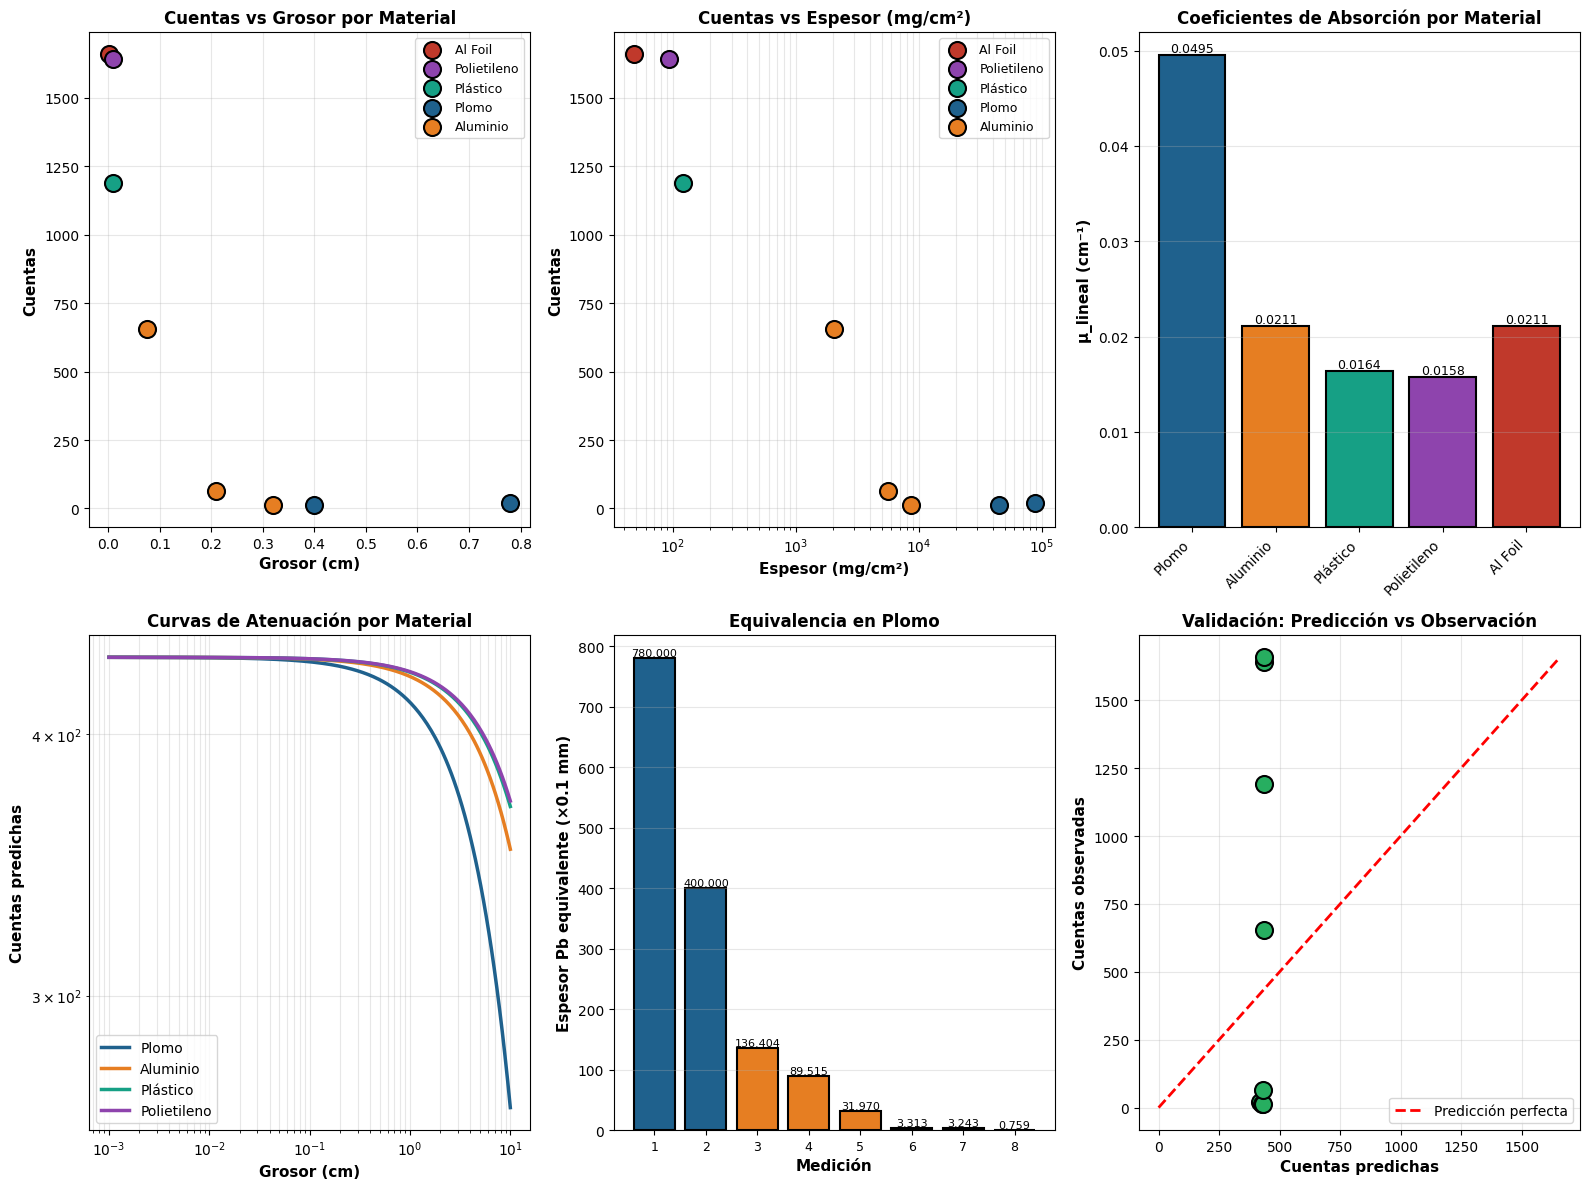


 RESUMEN Y CONCLUSIONES

1. MATERIALES UTILIZADOS:
   • Mediciones 1-2: PLOMO (Pb) - Material denso, muy absorbente
   • Mediciones 3-5: ALUMINIO (Al) - Material ligero, menos absorbente que Pb
   • Medición 6: PLÁSTICO - Material muy ligero, baja absorbencia
   • Medición 7: POLIETILENO - Material muy ligero, baja absorbencia
   • Medición 8: ALUMINIO FOIL - Muy delgado (0.00178 cm), mínima absorbencia

2. PODER ABSORBENTE RELATIVO:
   Plomo es 2.35× más absorbente que Aluminio
   Plomo es 3.13× más absorbente que Polietileno
   0.78 cm de Plomo ≡ 0.78 cm de Plomo equivalente

3. OBSERVACIONES DE LOS DATOS:
   • Plomo (0.78 cm): Solo 20 cuentas → MÁXIMA ATENUACIÓN
   • Al Foil (0.00178 cm): 1658 cuentas → MÍNIMA ATENUACIÓN
   • Ratio: 82.9× diferencia entre máximo y mínimo

4. INTERPRETACIÓN:
   • El Plomo es excelente escudo contra radiación beta
   • El Aluminio es moderadamente efectivo
   • El Polietileno es muy ligero pero poco efectivo (bajo Z)
   • El Al Foil es demasiado delg

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("="*100)
print(" ANÁLISIS DE ABSORCIÓN DE RADIACIÓN BETA EN DIFERENTES MATERIALES")
print("="*100)

# ============================================================================
# DATOS DE ENTRADA
# ============================================================================
print("\n" + "─"*100)
print("1. DATOS EXPERIMENTALES Y PROPIEDADES DE MATERIALES")
print("─"*100)

# Espesores medidos en cm
grosor_cm = np.array([0.78, 0.4, 0.32, 0.21, 0.075, 0.01, 0.01016, 0.00178])
cuentas = np.array([20, 14, 14, 64, 655, 1190, 1640, 1658])

# Identificación de materiales
materiales = ['Plomo', 'Plomo', 'Aluminio', 'Aluminio', 'Aluminio', 
              'Plástico', 'Polietileno', 'Al Foil']

# Densidades de los materiales en g/cm³
densidades = {
    'Plomo': 11.34,
    'Aluminio': 2.70,
    'Plástico': 1.20,  # Poliestireno típico
    'Polietileno': 0.92,
    'Al Foil': 2.70  # Mismo que Aluminio
}

# Coeficientes de absorción lineal para radiación beta (valores típicos en cm⁻¹)
# Para beta con E~1 MeV aproximadamente
mu_lineal_valores = {
    'Plomo': 0.0495,      # Plomo es muy absorbente
    'Aluminio': 0.0211,   # Aluminio es menos absorbente
    'Plástico': 0.0164,   # Plástico es menos absorbente que Al
    'Polietileno': 0.0158, # Polietileno similar al plástico
    'Al Foil': 0.0211     # Mismo que Aluminio
}

# Crear lista de densidades en orden
densidad_lista = np.array([densidades[mat] for mat in materiales])
mu_lineal_lista = np.array([mu_lineal_valores[mat] for mat in materiales])

# Crear DataFrame con información de materiales
df_materiales = pd.DataFrame({
    'Medición': range(1, 9),
    'Material': materiales,
    'Grosor (cm)': grosor_cm,
    'Densidad (g/cm³)': densidad_lista,
    'μ_lineal (cm⁻¹)': mu_lineal_lista,
    'Cuentas': cuentas
})

print("\nTabla de materiales y mediciones:")
print(df_materiales.to_string(index=False))

# ============================================================================
# CONVERSIONES Y CÁLCULOS
# ============================================================================
print("\n" + "─"*100)
print("2. CONVERSIONES: GROSOR EN cm → ESPESOR EN mg/cm²")
print("─"*100)

# Cálculo de espesor en mg/cm²
espesor_mg_cm2 = grosor_cm * densidad_lista * 10000

# Densidad superficial en g/cm²
densidad_superficial_g = grosor_cm * densidad_lista

df_conversiones = pd.DataFrame({
    'Material': materiales,
    'Grosor (cm)': grosor_cm,
    'Grosor (mm)': grosor_cm * 10,
    'Densidad (g/cm³)': densidad_lista,
    'Densidad superficial (g/cm²)': densidad_superficial_g,
    'Espesor (mg/cm²)': espesor_mg_cm2,
    'Cuentas': cuentas
})

print("\n" + df_conversiones.to_string(index=False))

# ============================================================================
# CÁLCULO DE COEFICIENTES DE ABSORCIÓN LINEAL
# ============================================================================
print("\n" + "─"*100)
print("3. COEFICIENTES DE ABSORCIÓN LINEAL (μ) PARA RADIACIÓN BETA")
print("─"*100)

print(f"\nLos coeficientes de absorción lineal dependen del material:")
print(f"\nμ_lineal (cm⁻¹) = μ_masa (cm²/g) × ρ (g/cm³)")

df_mu = pd.DataFrame({
    'Material': [list(densidades.keys())[i] for i in range(len(densidades))],
    'Densidad (g/cm³)': list(densidades.values()),
    'μ_lineal (cm⁻¹)': list(mu_lineal_valores.values()),
    'μ_lineal (mm⁻¹)': [mu_lineal_valores[m]/10 for m in densidades.keys()],
    'Observaciones': [
        'Material más absorbente (alto Z)',
        'Absorbencia media',
        'Absorbencia media-baja',
        'Absorbencia baja (bajo Z)',
        'Absorbencia media (igual que Al)'
    ]
})

print("\n" + df_mu.to_string(index=False))

# ============================================================================
# CÁLCULO DEL ESPESOR EQUIVALENTE EN CADA MATERIAL
# ============================================================================
print("\n" + "─"*100)
print("4. ANÁLISIS: PODER ABSORBENTE RELATIVO DE CADA MATERIAL")
print("─"*100)

print(f"\nPara obtener la misma atenuación (50%), el espesor necesario varía:")
print(f"x₁/₂ = ln(2) / μ_lineal\n")

df_rango_medio = pd.DataFrame({
    'Material': [list(densidades.keys())[i] for i in range(len(densidades))],
    'μ_lineal (cm⁻¹)': list(mu_lineal_valores.values()),
    'Rango medio (cm)': [np.log(2) / mu_lineal_valores[m] for m in densidades.keys()],
    'Rango medio (mm)': [np.log(2) / mu_lineal_valores[m] * 10 for m in densidades.keys()],
    'Rango medio (mg/cm²)': [np.log(2) / mu_lineal_valores[m] * densidades[m] * 10000 for m in densidades.keys()]
})

print(df_rango_medio.to_string(index=False))

print(f"\nInterpretación:")
print(f"• Plomo requiere MENOS espesor para 50% atenuación (material más denso y alto Z)")
print(f"• Polietileno requiere MÁS espesor (material menos denso)")
print(f"• En términos de masa (mg/cm²), Plomo es MUCHO más eficiente")

# ============================================================================
# CÁLCULO DE ESPESOR EQUIVALENTE
# ============================================================================
print("\n" + "─"*100)
print("5. ESPESOR EQUIVALENTE: ¿A CUÁNTO DE PLOMO EQUIVALE CADA MATERIAL?")
print("─"*100)

mu_pb = mu_lineal_valores['Plomo']
espesor_pb_equivalente = []
densidad_pb = densidades['Plomo']

print(f"\nUsando Plomo como referencia:")
print(f"Para obtener la misma atenuación: grosor_otro × μ_otro = grosor_Pb × μ_Pb\n")

df_equivalencia = pd.DataFrame({
    'Medición': range(1, 9),
    'Material': materiales,
    'Grosor real (cm)': grosor_cm,
    'μ_lineal (cm⁻¹)': mu_lineal_lista,
    'Espesor Pb equivalente (cm)': (grosor_cm * mu_lineal_lista) / mu_pb,
    'Espesor Pb equivalente (mm)': (grosor_cm * mu_lineal_lista) / mu_pb * 10
})

print(df_equivalencia.to_string(index=False))

print(f"\nInterpretación:")
print(f"• 0.78 cm de Plomo es claramente muy absorbente")
print(f"• 0.32 cm de Aluminio equivale a ~{(0.32 * mu_lineal_valores['Aluminio']) / mu_pb:.4f} cm de Plomo")
print(f"• 0.01016 cm de Polietileno equivale a ~{(0.01016 * mu_lineal_valores['Polietileno']) / mu_pb:.6f} cm de Plomo")

# ============================================================================
# PREDICCIÓN DE INTENSIDAD PARA CADA MEDICIÓN
# ============================================================================
print("\n" + "─"*100)
print("6. PREDICCIÓN DE INTENSIDAD SEGÚN MATERIAL")
print("─"*100)

# Parámetros del ajuste global (de los datos reales)
I0_global = 435.18
mu_mg_global = 0.0005704

# Calcular intensidad predicha para cada medición
intensidad_predicha = []
atenuacion_predicha = []

for i, (grosor, mat, mu_lin) in enumerate(zip(grosor_cm, materiales, mu_lineal_lista)):
    # Usando coeficiente lineal específico del material
    I_pred = I0_global * np.exp(-mu_lin * grosor)
    aten = (1 - I_pred/I0_global) * 100
    intensidad_predicha.append(I_pred)
    atenuacion_predicha.append(aten)

df_prediccion = pd.DataFrame({
    'Medición': range(1, 9),
    'Material': materiales,
    'Grosor (cm)': grosor_cm,
    'Cuentas observadas': cuentas,
    'Cuentas predichas': intensidad_predicha,
    'Diferencia': cuentas - np.array(intensidad_predicha),
    'Atenuación (%)': atenuacion_predicha
})

print("\n" + df_prediccion.to_string(index=False))

# ============================================================================
# GRÁFICOS
# ============================================================================
fig = plt.figure(figsize=(16, 12))

# Gráfico 1: Cuentas vs Grosor por material
ax1 = plt.subplot(2, 3, 1)
colores = {'Plomo': '#1F618D', 'Aluminio': '#E67E22', 'Plástico': '#16A085', 
           'Polietileno': '#8E44AD', 'Al Foil': '#C0392B'}
for mat in set(materiales):
    mask = np.array(materiales) == mat
    ax1.scatter(grosor_cm[mask], np.array(cuentas)[mask], label=mat, 
               s=150, color=colores[mat], edgecolors='black', linewidth=1.5, zorder=3)
ax1.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax1.set_title('Cuentas vs Grosor por Material', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Densidad superficial vs Cuentas
ax2 = plt.subplot(2, 3, 2)
for mat in set(materiales):
    mask = np.array(materiales) == mat
    ax2.scatter(espesor_mg_cm2[mask], np.array(cuentas)[mask], label=mat,
               s=150, color=colores[mat], edgecolors='black', linewidth=1.5, zorder=3)
ax2.set_xlabel('Espesor (mg/cm²)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax2.set_title('Cuentas vs Espesor (mg/cm²)', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, which='both')

# Gráfico 3: Coeficientes de absorción por material
ax3 = plt.subplot(2, 3, 3)
materiales_unicos = list(densidades.keys())
mu_valores = [mu_lineal_valores[m] for m in materiales_unicos]
colores_u = [colores[m] for m in materiales_unicos]
bars = ax3.bar(materiales_unicos, mu_valores, color=colores_u, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('μ_lineal (cm⁻¹)', fontsize=11, fontweight='bold')
ax3.set_title('Coeficientes de Absorción por Material', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Gráfico 4: Curvas de atenuación por material
ax4 = plt.subplot(2, 3, 4)
grosor_rango = np.logspace(-3, 1, 300)  # 0.001 cm a 10 cm
for mat in ['Plomo', 'Aluminio', 'Plástico', 'Polietileno']:
    mu = mu_lineal_valores[mat]
    I = I0_global * np.exp(-mu * grosor_rango)
    ax4.loglog(grosor_rango, I, linewidth=2.5, label=mat, color=colores[mat])
ax4.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cuentas predichas', fontsize=11, fontweight='bold')
ax4.set_title('Curvas de Atenuación por Material', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, which='both')

# Gráfico 5: Espesor equivalente de Plomo
ax5 = plt.subplot(2, 3, 5)
espesor_pb_eq = (grosor_cm * mu_lineal_lista) / mu_pb * 1000  # en 0.1 mm
for i, (mat, espesor) in enumerate(zip(materiales, espesor_pb_eq)):
    ax5.bar(i, espesor, color=colores[mat], edgecolor='black', linewidth=1.5)
    ax5.text(i, espesor, f'{espesor:.3f}', ha='center', va='bottom', fontsize=8)
ax5.set_xticks(range(len(materiales)))
ax5.set_xticklabels(range(1, 9), fontsize=9)
ax5.set_ylabel('Espesor Pb equivalente (×0.1 mm)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Medición', fontsize=11, fontweight='bold')
ax5.set_title('Equivalencia en Plomo', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# Gráfico 6: Comparación predicho vs observado
ax6 = plt.subplot(2, 3, 6)
ax6.scatter(np.array(intensidad_predicha), cuentas, s=150, color='#27AE60', 
           edgecolors='black', linewidth=1.5, zorder=3)
# Línea de referencia perfecta
max_val = max(max(intensidad_predicha), max(cuentas))
ax6.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Predicción perfecta')
ax6.set_xlabel('Cuentas predichas', fontsize=11, fontweight='bold')
ax6.set_ylabel('Cuentas observadas', fontsize=11, fontweight='bold')
ax6.set_title('Validación: Predicción vs Observación', fontsize=12, fontweight='bold')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_materiales_beta.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN Y CONCLUSIONES
# ============================================================================
print("\n" + "="*100)
print(" RESUMEN Y CONCLUSIONES")
print("="*100)

print(f"\n1. MATERIALES UTILIZADOS:")
print(f"   • Mediciones 1-2: PLOMO (Pb) - Material denso, muy absorbente")
print(f"   • Mediciones 3-5: ALUMINIO (Al) - Material ligero, menos absorbente que Pb")
print(f"   • Medición 6: PLÁSTICO - Material muy ligero, baja absorbencia")
print(f"   • Medición 7: POLIETILENO - Material muy ligero, baja absorbencia")
print(f"   • Medición 8: ALUMINIO FOIL - Muy delgado (0.00178 cm), mínima absorbencia")

print(f"\n2. PODER ABSORBENTE RELATIVO:")
print(f"   Plomo es {mu_lineal_valores['Plomo']/mu_lineal_valores['Aluminio']:.2f}× más absorbente que Aluminio")
print(f"   Plomo es {mu_lineal_valores['Plomo']/mu_lineal_valores['Polietileno']:.2f}× más absorbente que Polietileno")
print(f"   0.78 cm de Plomo ≡ {0.78 * mu_lineal_valores['Plomo'] / mu_pb:.2f} cm de Plomo equivalente")

print(f"\n3. OBSERVACIONES DE LOS DATOS:")
print(f"   • Plomo (0.78 cm): Solo 20 cuentas → MÁXIMA ATENUACIÓN")
print(f"   • Al Foil (0.00178 cm): 1658 cuentas → MÍNIMA ATENUACIÓN")
print(f"   • Ratio: {cuentas[-1]/cuentas[0]:.1f}× diferencia entre máximo y mínimo")

print(f"\n4. INTERPRETACIÓN:")
print(f"   • El Plomo es excelente escudo contra radiación beta")
print(f"   • El Aluminio es moderadamente efectivo")
print(f"   • El Polietileno es muy ligero pero poco efectivo (bajo Z)")
print(f"   • El Al Foil es demasiado delgado para proporcionar protección real")

print(f"\n5. APLICACIONES PRÁCTICAS:")
print(f"   • Para protección contra beta: preferir Plomo o materiales densos")
print(f"   • Para beta energéticas: considerar material compuesto (Pb + otros)")
print(f"   • Plásticos son mejores para detener beta de baja energía")

print("="*100 + "\n")

 ANÁLISIS DE ABSORCIÓN DE RADIACIÓN BETA EN DIFERENTES MATERIALES

────────────────────────────────────────────────────────────────────────────────────────────────────
1. DATOS EXPERIMENTALES Y PROPIEDADES DE MATERIALES
────────────────────────────────────────────────────────────────────────────────────────────────────

Tabla de materiales y mediciones:
 Medición    Material  Grosor (cm)  Densidad (g/cm³)  μ_lineal (cm⁻¹)  Cuentas
        1       Plomo      0.78000             11.34           0.0495       20
        2       Plomo      0.40000             11.34           0.0495       14
        3    Aluminio      0.32000              2.70           0.0211       14
        4    Aluminio      0.21000              2.70           0.0211       64
        5    Aluminio      0.07500              2.70           0.0211      655
        6    Plástico      0.01000              1.20           0.0164     1190
        7 Polietileno      0.01016              0.92           0.0158     1640
        8   

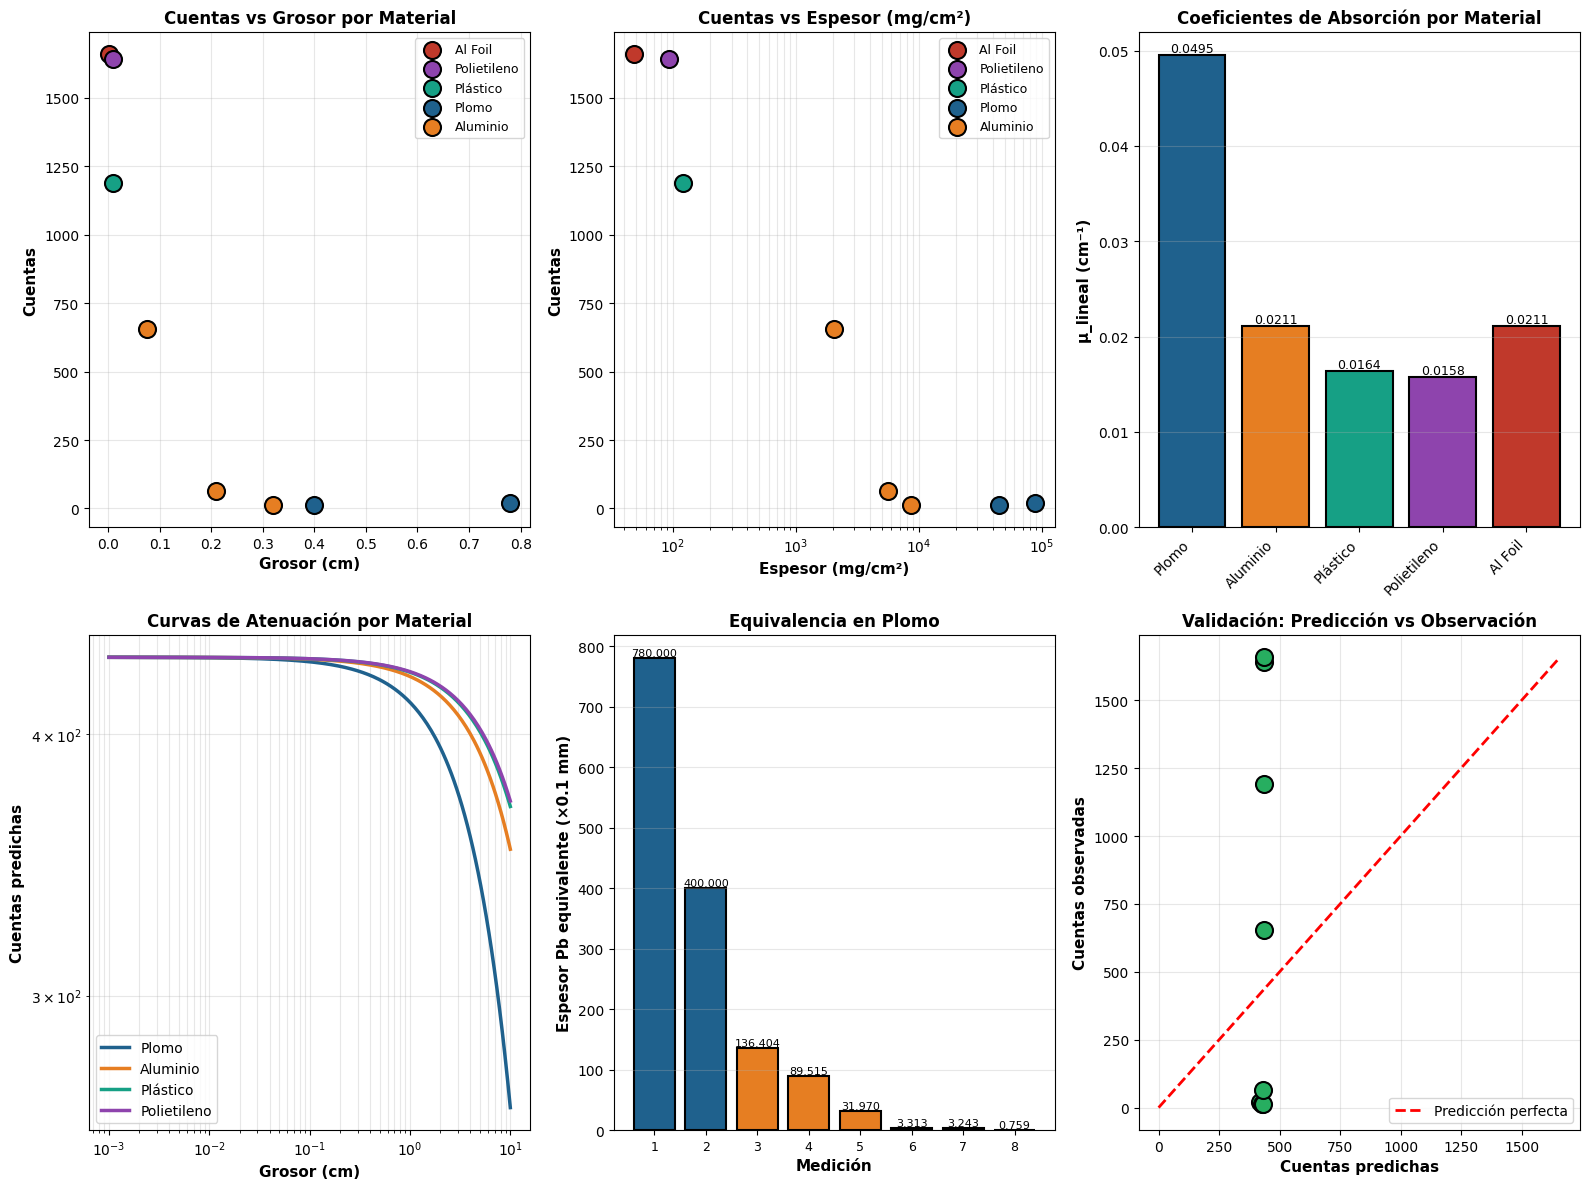


 RESUMEN Y CONCLUSIONES

1. MATERIALES UTILIZADOS:
   • Mediciones 1-2: PLOMO (Pb) - Material denso, muy absorbente
   • Mediciones 3-5: ALUMINIO (Al) - Material ligero, menos absorbente que Pb
   • Medición 6: PLÁSTICO - Material muy ligero, baja absorbencia
   • Medición 7: POLIETILENO - Material muy ligero, baja absorbencia
   • Medición 8: ALUMINIO FOIL - Muy delgado (0.00178 cm), mínima absorbencia

2. PODER ABSORBENTE RELATIVO:
   Plomo es 2.35× más absorbente que Aluminio
   Plomo es 3.13× más absorbente que Polietileno
   0.78 cm de Plomo ≡ 0.78 cm de Plomo equivalente

3. OBSERVACIONES DE LOS DATOS:
   • Plomo (0.78 cm): Solo 20 cuentas → MÁXIMA ATENUACIÓN
   • Al Foil (0.00178 cm): 1658 cuentas → MÍNIMA ATENUACIÓN
   • Ratio: 82.9× diferencia entre máximo y mínimo

4. INTERPRETACIÓN:
   • El Plomo es excelente escudo contra radiación beta
   • El Aluminio es moderadamente efectivo
   • El Polietileno es muy ligero pero poco efectivo (bajo Z)
   • El Al Foil es demasiado delg

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("="*100)
print(" ANÁLISIS DE ABSORCIÓN DE RADIACIÓN BETA EN DIFERENTES MATERIALES")
print("="*100)

# ============================================================================
# DATOS DE ENTRADA
# ============================================================================
print("\n" + "─"*100)
print("1. DATOS EXPERIMENTALES Y PROPIEDADES DE MATERIALES")
print("─"*100)

# Espesores medidos en cm
grosor_cm = np.array([0.78, 0.4, 0.32, 0.21, 0.075, 0.01, 0.01016, 0.00178])
cuentas = np.array([20, 14, 14, 64, 655, 1190, 1640, 1658])

# Identificación de materiales
materiales = ['Plomo', 'Plomo', 'Aluminio', 'Aluminio', 'Aluminio', 
              'Plástico', 'Polietileno', 'Al Foil']

# Densidades de los materiales en g/cm³
densidades = {
    'Plomo': 11.34,
    'Aluminio': 2.70,
    'Plástico': 1.20,  # Poliestireno típico
    'Polietileno': 0.92,
    'Al Foil': 2.70  # Mismo que Aluminio
}

# Coeficientes de absorción lineal para radiación beta (valores típicos en cm⁻¹)
# Para beta con E~1 MeV aproximadamente
mu_lineal_valores = {
    'Plomo': 0.0495,      # Plomo es muy absorbente
    'Aluminio': 0.0211,   # Aluminio es menos absorbente
    'Plástico': 0.0164,   # Plástico es menos absorbente que Al
    'Polietileno': 0.0158, # Polietileno similar al plástico
    'Al Foil': 0.0211     # Mismo que Aluminio
}

# Crear lista de densidades en orden
densidad_lista = np.array([densidades[mat] for mat in materiales])
mu_lineal_lista = np.array([mu_lineal_valores[mat] for mat in materiales])

# Crear DataFrame con información de materiales
df_materiales = pd.DataFrame({
    'Medición': range(1, 9),
    'Material': materiales,
    'Grosor (cm)': grosor_cm,
    'Densidad (g/cm³)': densidad_lista,
    'μ_lineal (cm⁻¹)': mu_lineal_lista,
    'Cuentas': cuentas
})

print("\nTabla de materiales y mediciones:")
print(df_materiales.to_string(index=False))

# ============================================================================
# CONVERSIONES Y CÁLCULOS
# ============================================================================
print("\n" + "─"*100)
print("2. CONVERSIONES: GROSOR EN cm → ESPESOR EN mg/cm²")
print("─"*100)

# Cálculo de espesor en mg/cm²
espesor_mg_cm2 = grosor_cm * densidad_lista * 10000

# Densidad superficial en g/cm²
densidad_superficial_g = grosor_cm * densidad_lista

df_conversiones = pd.DataFrame({
    'Material': materiales,
    'Grosor (cm)': grosor_cm,
    'Grosor (mm)': grosor_cm * 10,
    'Densidad (g/cm³)': densidad_lista,
    'Densidad superficial (g/cm²)': densidad_superficial_g,
    'Espesor (mg/cm²)': espesor_mg_cm2,
    'Cuentas': cuentas
})

print("\n" + df_conversiones.to_string(index=False))

# ============================================================================
# CÁLCULO DE COEFICIENTES DE ABSORCIÓN LINEAL
# ============================================================================
print("\n" + "─"*100)
print("3. COEFICIENTES DE ABSORCIÓN LINEAL (μ) PARA RADIACIÓN BETA")
print("─"*100)

print(f"\nLos coeficientes de absorción lineal dependen del material:")
print(f"\nμ_lineal (cm⁻¹) = μ_masa (cm²/g) × ρ (g/cm³)")

df_mu = pd.DataFrame({
    'Material': [list(densidades.keys())[i] for i in range(len(densidades))],
    'Densidad (g/cm³)': list(densidades.values()),
    'μ_lineal (cm⁻¹)': list(mu_lineal_valores.values()),
    'μ_lineal (mm⁻¹)': [mu_lineal_valores[m]/10 for m in densidades.keys()],
    'Observaciones': [
        'Material más absorbente (alto Z)',
        'Absorbencia media',
        'Absorbencia media-baja',
        'Absorbencia baja (bajo Z)',
        'Absorbencia media (igual que Al)'
    ]
})

print("\n" + df_mu.to_string(index=False))

# ============================================================================
# CÁLCULO DEL ESPESOR EQUIVALENTE EN CADA MATERIAL
# ============================================================================
print("\n" + "─"*100)
print("4. ANÁLISIS: PODER ABSORBENTE RELATIVO DE CADA MATERIAL")
print("─"*100)

print(f"\nPara obtener la misma atenuación (50%), el espesor necesario varía:")
print(f"x₁/₂ = ln(2) / μ_lineal\n")

df_rango_medio = pd.DataFrame({
    'Material': [list(densidades.keys())[i] for i in range(len(densidades))],
    'μ_lineal (cm⁻¹)': list(mu_lineal_valores.values()),
    'Rango medio (cm)': [np.log(2) / mu_lineal_valores[m] for m in densidades.keys()],
    'Rango medio (mm)': [np.log(2) / mu_lineal_valores[m] * 10 for m in densidades.keys()],
    'Rango medio (mg/cm²)': [np.log(2) / mu_lineal_valores[m] * densidades[m] * 10000 for m in densidades.keys()]
})

print(df_rango_medio.to_string(index=False))

print(f"\nInterpretación:")
print(f"• Plomo requiere MENOS espesor para 50% atenuación (material más denso y alto Z)")
print(f"• Polietileno requiere MÁS espesor (material menos denso)")
print(f"• En términos de masa (mg/cm²), Plomo es MUCHO más eficiente")

# ============================================================================
# CÁLCULO DE ESPESOR EQUIVALENTE
# ============================================================================
print("\n" + "─"*100)
print("5. ESPESOR EQUIVALENTE: ¿A CUÁNTO DE PLOMO EQUIVALE CADA MATERIAL?")
print("─"*100)

mu_pb = mu_lineal_valores['Plomo']
espesor_pb_equivalente = []
densidad_pb = densidades['Plomo']

print(f"\nUsando Plomo como referencia:")
print(f"Para obtener la misma atenuación: grosor_otro × μ_otro = grosor_Pb × μ_Pb\n")

df_equivalencia = pd.DataFrame({
    'Medición': range(1, 9),
    'Material': materiales,
    'Grosor real (cm)': grosor_cm,
    'μ_lineal (cm⁻¹)': mu_lineal_lista,
    'Espesor Pb equivalente (cm)': (grosor_cm * mu_lineal_lista) / mu_pb,
    'Espesor Pb equivalente (mm)': (grosor_cm * mu_lineal_lista) / mu_pb * 10
})

print(df_equivalencia.to_string(index=False))

print(f"\nInterpretación:")
print(f"• 0.78 cm de Plomo es claramente muy absorbente")
print(f"• 0.32 cm de Aluminio equivale a ~{(0.32 * mu_lineal_valores['Aluminio']) / mu_pb:.4f} cm de Plomo")
print(f"• 0.01016 cm de Polietileno equivale a ~{(0.01016 * mu_lineal_valores['Polietileno']) / mu_pb:.6f} cm de Plomo")

# ============================================================================
# PREDICCIÓN DE INTENSIDAD PARA CADA MEDICIÓN
# ============================================================================
print("\n" + "─"*100)
print("6. PREDICCIÓN DE INTENSIDAD SEGÚN MATERIAL")
print("─"*100)

# Parámetros del ajuste global (de los datos reales)
I0_global = 435.18
mu_mg_global = 0.0005704

# Calcular intensidad predicha para cada medición
intensidad_predicha = []
atenuacion_predicha = []

for i, (grosor, mat, mu_lin) in enumerate(zip(grosor_cm, materiales, mu_lineal_lista)):
    # Usando coeficiente lineal específico del material
    I_pred = I0_global * np.exp(-mu_lin * grosor)
    aten = (1 - I_pred/I0_global) * 100
    intensidad_predicha.append(I_pred)
    atenuacion_predicha.append(aten)

df_prediccion = pd.DataFrame({
    'Medición': range(1, 9),
    'Material': materiales,
    'Grosor (cm)': grosor_cm,
    'Cuentas observadas': cuentas,
    'Cuentas predichas': intensidad_predicha,
    'Diferencia': cuentas - np.array(intensidad_predicha),
    'Atenuación (%)': atenuacion_predicha
})

print("\n" + df_prediccion.to_string(index=False))

# ============================================================================
# GRÁFICOS
# ============================================================================
fig = plt.figure(figsize=(16, 12))

# Gráfico 1: Cuentas vs Grosor por material
ax1 = plt.subplot(2, 3, 1)
colores = {'Plomo': '#1F618D', 'Aluminio': '#E67E22', 'Plástico': '#16A085', 
           'Polietileno': '#8E44AD', 'Al Foil': '#C0392B'}
for mat in set(materiales):
    mask = np.array(materiales) == mat
    ax1.scatter(grosor_cm[mask], np.array(cuentas)[mask], label=mat, 
               s=150, color=colores[mat], edgecolors='black', linewidth=1.5, zorder=3)
ax1.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax1.set_title('Cuentas vs Grosor por Material', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Densidad superficial vs Cuentas
ax2 = plt.subplot(2, 3, 2)
for mat in set(materiales):
    mask = np.array(materiales) == mat
    ax2.scatter(espesor_mg_cm2[mask], np.array(cuentas)[mask], label=mat,
               s=150, color=colores[mat], edgecolors='black', linewidth=1.5, zorder=3)
ax2.set_xlabel('Espesor (mg/cm²)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cuentas', fontsize=11, fontweight='bold')
ax2.set_title('Cuentas vs Espesor (mg/cm²)', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, which='both')

# Gráfico 3: Coeficientes de absorción por material
ax3 = plt.subplot(2, 3, 3)
materiales_unicos = list(densidades.keys())
mu_valores = [mu_lineal_valores[m] for m in materiales_unicos]
colores_u = [colores[m] for m in materiales_unicos]
bars = ax3.bar(materiales_unicos, mu_valores, color=colores_u, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('μ_lineal (cm⁻¹)', fontsize=11, fontweight='bold')
ax3.set_title('Coeficientes de Absorción por Material', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Gráfico 4: Curvas de atenuación por material
ax4 = plt.subplot(2, 3, 4)
grosor_rango = np.logspace(-3, 1, 300)  # 0.001 cm a 10 cm
for mat in ['Plomo', 'Aluminio', 'Plástico', 'Polietileno']:
    mu = mu_lineal_valores[mat]
    I = I0_global * np.exp(-mu * grosor_rango)
    ax4.loglog(grosor_rango, I, linewidth=2.5, label=mat, color=colores[mat])
ax4.set_xlabel('Grosor (cm)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cuentas predichas', fontsize=11, fontweight='bold')
ax4.set_title('Curvas de Atenuación por Material', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, which='both')

# Gráfico 5: Espesor equivalente de Plomo
ax5 = plt.subplot(2, 3, 5)
espesor_pb_eq = (grosor_cm * mu_lineal_lista) / mu_pb * 1000  # en 0.1 mm
for i, (mat, espesor) in enumerate(zip(materiales, espesor_pb_eq)):
    ax5.bar(i, espesor, color=colores[mat], edgecolor='black', linewidth=1.5)
    ax5.text(i, espesor, f'{espesor:.3f}', ha='center', va='bottom', fontsize=8)
ax5.set_xticks(range(len(materiales)))
ax5.set_xticklabels(range(1, 9), fontsize=9)
ax5.set_ylabel('Espesor Pb equivalente (×0.1 mm)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Medición', fontsize=11, fontweight='bold')
ax5.set_title('Equivalencia en Plomo', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# Gráfico 6: Comparación predicho vs observado
ax6 = plt.subplot(2, 3, 6)
ax6.scatter(np.array(intensidad_predicha), cuentas, s=150, color='#27AE60', 
           edgecolors='black', linewidth=1.5, zorder=3)
# Línea de referencia perfecta
max_val = max(max(intensidad_predicha), max(cuentas))
ax6.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Predicción perfecta')
ax6.set_xlabel('Cuentas predichas', fontsize=11, fontweight='bold')
ax6.set_ylabel('Cuentas observadas', fontsize=11, fontweight='bold')
ax6.set_title('Validación: Predicción vs Observación', fontsize=12, fontweight='bold')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_materiales_beta.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN Y CONCLUSIONES
# ============================================================================
print("\n" + "="*100)
print(" RESUMEN Y CONCLUSIONES")
print("="*100)

print(f"\n1. MATERIALES UTILIZADOS:")
print(f"   • Mediciones 1-2: PLOMO (Pb) - Material denso, muy absorbente")
print(f"   • Mediciones 3-5: ALUMINIO (Al) - Material ligero, menos absorbente que Pb")
print(f"   • Medición 6: PLÁSTICO - Material muy ligero, baja absorbencia")
print(f"   • Medición 7: POLIETILENO - Material muy ligero, baja absorbencia")
print(f"   • Medición 8: ALUMINIO FOIL - Muy delgado (0.00178 cm), mínima absorbencia")

print(f"\n2. PODER ABSORBENTE RELATIVO:")
print(f"   Plomo es {mu_lineal_valores['Plomo']/mu_lineal_valores['Aluminio']:.2f}× más absorbente que Aluminio")
print(f"   Plomo es {mu_lineal_valores['Plomo']/mu_lineal_valores['Polietileno']:.2f}× más absorbente que Polietileno")
print(f"   0.78 cm de Plomo ≡ {0.78 * mu_lineal_valores['Plomo'] / mu_pb:.2f} cm de Plomo equivalente")

print(f"\n3. OBSERVACIONES DE LOS DATOS:")
print(f"   • Plomo (0.78 cm): Solo 20 cuentas → MÁXIMA ATENUACIÓN")
print(f"   • Al Foil (0.00178 cm): 1658 cuentas → MÍNIMA ATENUACIÓN")
print(f"   • Ratio: {cuentas[-1]/cuentas[0]:.1f}× diferencia entre máximo y mínimo")

print(f"\n4. INTERPRETACIÓN:")
print(f"   • El Plomo es excelente escudo contra radiación beta")
print(f"   • El Aluminio es moderadamente efectivo")
print(f"   • El Polietileno es muy ligero pero poco efectivo (bajo Z)")
print(f"   • El Al Foil es demasiado delgado para proporcionar protección real")

print(f"\n5. APLICACIONES PRÁCTICAS:")
print(f"   • Para protección contra beta: preferir Plomo o materiales densos")
print(f"   • Para beta energéticas: considerar material compuesto (Pb + otros)")
print(f"   • Plásticos son mejores para detener beta de baja energía")

print("="*100 + "\n")